In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [48]:
df= pd.read_csv("Advertising.csv")
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [50]:

# Convert Sales column to numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')  # converts non-numeric to NaN

# Classification label
df['SalesClass'] = ['High' if x > 15 else 'Low' for x in df['sales']]

X = df[['TV', 'radio', 'newspaper']]
y = df['SalesClass']

In [28]:
#X = data.drop('Tip', axis=1)
#y = data['Tip']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

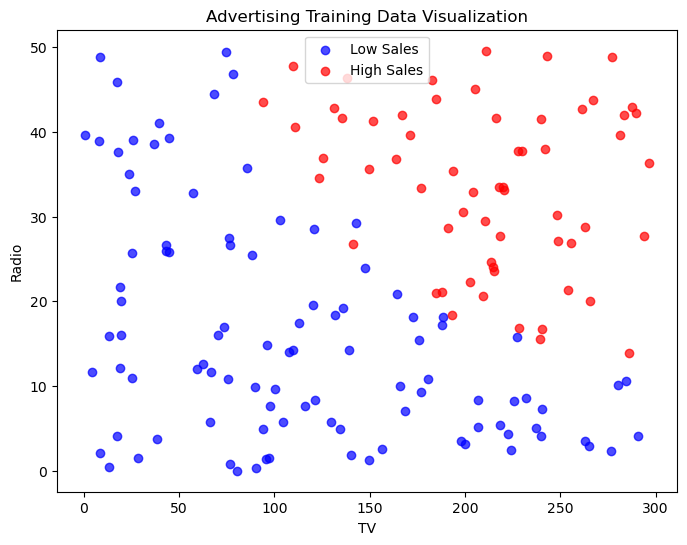

In [62]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Plot Low Sales
ax.scatter(X_train[y_train=='Low']['TV'], 
           X_train[y_train=='Low']['radio'], 
           color='blue', label='Low Sales', alpha=0.7)

# Plot High Sales
ax.scatter(X_train[y_train=='High']['TV'], 
           X_train[y_train=='High']['radio'], 
           color='red', label='High Sales', alpha=0.7)

plt.xlabel('TV')
plt.ylabel('Radio')
plt.title('Advertising Training Data Visualization')
plt.legend()
plt.show()


In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)
        
    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


In [73]:
def accuracy (y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("Perceptron accuracy:", accuracy(y_test_num, predictions))

Perceptron accuracy: 0.925


In [75]:
X_train_2d = X_train[:, :2]  # first 2 columns: TV and radio
X_test_2d = X_test[:, :2]

In [70]:
y_train_num = np.where(y_train == 'High', 1, 0)
y_test_num = np.where(y_test == 'High', 1, 0)

In [72]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train_num)
predictions = p.predict(X_test)

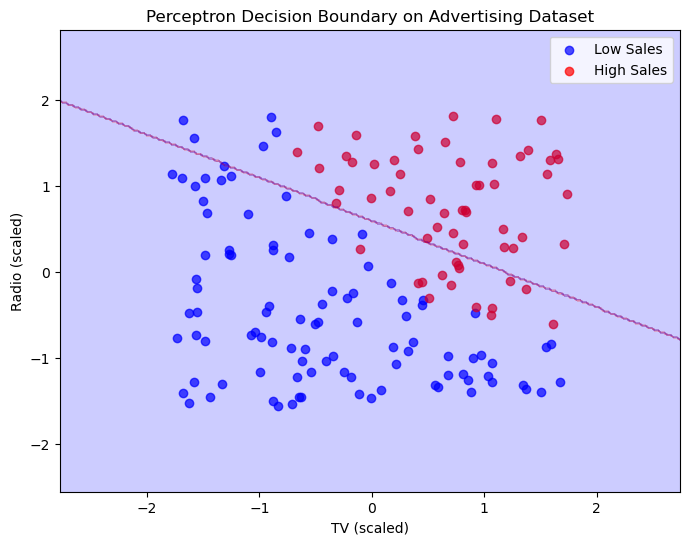

In [79]:

X = df[['TV', 'radio']].values  # 2 columns only
y = np.where(df['SalesClass'] == 'High', 1, 0)  # numeric labels

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Scatter points
ax.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color='blue', label='Low Sales', alpha=0.7)
ax.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='red', label='High Sales', alpha=0.7)

# Decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_train[:,0].min()-1, X_train[:,0].max()+1, 200),
    np.linspace(X_train[:,1].min()-1, X_train[:,1].max()+1, 200)
)
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['blue','red'])

plt.xlabel('TV (scaled)')
plt.ylabel('Radio (scaled)')
plt.title('Perceptron Decision Boundary on Advertising Dataset')
plt.legend()
plt.show()
